In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Importing Libraries

In [41]:
#linear algebra,data preprocessing,Csv files
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#for data cleaning
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

#for feature selection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#evalution metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#for classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

#model selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [4]:
#importing data
train_data = pd.read_csv('Z:\spoonshot/train1.csv')
test_data = pd.read_csv('Z:\spoonshot/test1.csv')

# Data Preprocessing and Exploring

In [5]:
train_data.head()

,category index,title,description
0,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
1,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
2,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
3,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
4,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...


In [6]:
test_data.head()

,category index,title,description
0,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
1,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
2,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
3,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
4,4,Open Letter Against British Copyright Indoctri...,The British Department for Education and Skill...


In [7]:
# I have changed the name of columns for the ease of use.

train_data['text'] = train_data['title'] + ' ' + train_data['description']
test_data['text'] = test_data['title'] + ' ' + test_data['description']  

In [8]:
#dropping unnecessary columns

train_data = train_data.drop(columns=['title', 'description'])
test_data = test_data.drop(columns=['title', 'description'])

In [9]:
#mapping category column with category index


categories = {1:'World News', 2:'Sports News', 3:'Business News', 4:'Science-Technology News'}

train_data['category'] = train_data['category index'].map(categories)
test_data['category'] = test_data['category index'].map(categories)

train_data = train_data.drop(columns=['category index'])
test_data = test_data.drop(columns=['category index'])

In [10]:
train_data.head()

,text,category
0,Carlyle Looks Toward Commercial Aerospace (Reu...,Business News
1,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business News
2,Iraq Halts Oil Exports from Main Southern Pipe...,Business News
3,"Oil prices soar to all-time record, posing new...",Business News
4,"Stocks End Up, But Near Year Lows (Reuters) Re...",Business News


In [11]:
test_data.head()

,text,category
0,The Race is On: Second Private Team Sets Launc...,Science-Technology News
1,Ky. Company Wins Grant to Study Peptides (AP) ...,Science-Technology News
2,Prediction Unit Helps Forecast Wildfires (AP) ...,Science-Technology News
3,Calif. Aims to Limit Farm-Related Smog (AP) AP...,Science-Technology News
4,Open Letter Against British Copyright Indoctri...,Science-Technology News


# Data Visualization

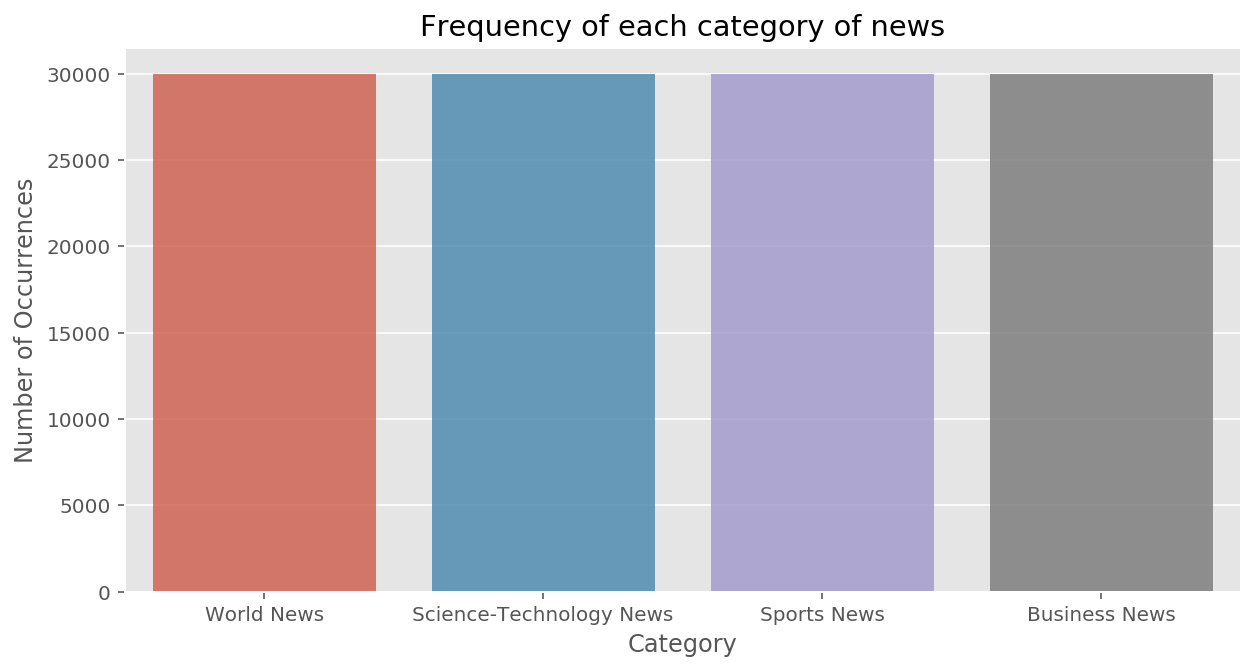

In [52]:
plt.style.use('ggplot')
category  = train_data['category'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(category.index, category.values, alpha=0.8)
plt.title('Frequency of each category of news')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

# Data Cleaning

In [19]:
#removing punctuations


def remove_punc(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

train_data['text'] = train_data['text'].apply(lambda x: remove_punc(x))
test_data['text'] = test_data['text'].apply(lambda x: remove_punc(x))

In [20]:
#normalizing case

def normalize(text):        
    lower_case = text.lower()
    tokens=word_tokenize(lower_case)
    return (" ".join(tokens)).strip()



train_data['text'] = train_data['text'].apply(lambda x: normalize(x))
test_data['text'] = test_data['text'].apply(lambda x: normalize(x))

In [21]:
#removing stop words

nltk_stop_words = nltk.corpus.stopwords.words('english')
def remove_stop(text):        
    word_list=[word for word in text.split() if word not in nltk_stop_words]
    return " ".join(word_list)

train_data['text'] = train_data['text'].apply(lambda x: remove_stop(x))
test_data['text'] = test_data['text'].apply(lambda x: remove_stop(x))

In [22]:
#lemmatizing 

lemmatizer = WordNetLemmatizer()
def lemma(text): 
    lemmas = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(lemmas)

train_data['text'] = train_data['text'].apply(lambda x: lemma(x))
test_data['text'] = test_data['text'].apply(lambda x: lemma(x))

# Feature Extraction

In [23]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data.text)
X_train_counts.shape

(119999, 82525)

In [24]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(119999, 82525)

# Running Machine Learning Algorithm

# Multinomial Naives Bayes

In [25]:
clf = MultinomialNB().fit(X_train_tfidf, train_data.category)
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB()),])

text_clf = text_clf.fit(train_data.text, train_data.category)

In [26]:
predicted_mnb = text_clf.predict(test_data.text)
np.mean(predicted_mnb == test_data.category)

0.9006448216870641

In [27]:
classification_report(test_data.category,predicted_mnb)

'                         precision    recall  f1-score   support\n\n          Business News       0.86      0.86      0.86      1899\nScience-Technology News       0.88      0.87      0.88      1900\n            Sports News       0.95      0.98      0.96      1900\n             World News       0.91      0.89      0.90      1900\n\n               accuracy                           0.90      7599\n              macro avg       0.90      0.90      0.90      7599\n           weighted avg       0.90      0.90      0.90      7599\n'

In [28]:
confusion_matrix(test_data.category,predicted_mnb)

array([[1630,  180,   17,   72],
       [ 153, 1661,   19,   67],
       [  12,    8, 1859,   21],
       [ 102,   42,   62, 1694]], dtype=int64)

# SVM Algorithm

In [29]:
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                     ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3,random_state=42)),])

text_clf_svm = text_clf_svm.fit(train_data.text, train_data.category)
predicted_svm = text_clf_svm.predict(test_data.text)
np.mean(predicted_svm == test_data.category)

0.8798526121858139

In [30]:
classification_report(test_data.category,predicted_svm)

'                         precision    recall  f1-score   support\n\n          Business News       0.86      0.83      0.85      1899\nScience-Technology News       0.88      0.83      0.85      1900\n            Sports News       0.88      0.98      0.93      1900\n             World News       0.90      0.88      0.89      1900\n\n               accuracy                           0.88      7599\n              macro avg       0.88      0.88      0.88      7599\n           weighted avg       0.88      0.88      0.88      7599\n'

In [31]:
confusion_matrix(test_data.category,predicted_svm)

array([[1578,  179,   58,   84],
       [ 153, 1569,   94,   84],
       [  11,    3, 1867,   19],
       [  92,   41,   95, 1672]], dtype=int64)

# Logistic Regression

In [32]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=10000)),
               ])
logreg=logreg.fit(train_data.text,train_data.category)
predicted_logreg = logreg.predict(test_data.text)
np.mean(predicted_logreg == test_data.category)


0.8543229372285827

In [33]:
classification_report(test_data.category,predicted_logreg)

'                         precision    recall  f1-score   support\n\n          Business News       0.81      0.81      0.81      1899\nScience-Technology News       0.82      0.82      0.82      1900\n            Sports News       0.94      0.93      0.94      1900\n             World News       0.85      0.85      0.85      1900\n\n               accuracy                           0.85      7599\n              macro avg       0.85      0.85      0.85      7599\n           weighted avg       0.85      0.85      0.85      7599\n'

In [34]:
confusion_matrix(test_data.category,predicted_logreg)

array([[1544,  215,   19,  121],
       [ 222, 1560,   22,   96],
       [  28,   40, 1773,   59],
       [ 124,   89,   72, 1615]], dtype=int64)

# Grid SearchCV

In [43]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3),
 }

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train_data.text, train_data.category)
predicted_gs = gs_clf.predict(test_data.text)
np.mean(predicted_gs == test_data.category)

0.9160415844190025

In [45]:
classification_report(test_data.category,predicted_gs)

'                         precision    recall  f1-score   support\n\n          Business News       0.89      0.88      0.88      1899\nScience-Technology News       0.89      0.90      0.89      1900\n            Sports News       0.96      0.99      0.97      1900\n             World News       0.93      0.90      0.92      1900\n\n               accuracy                           0.92      7599\n              macro avg       0.92      0.92      0.92      7599\n           weighted avg       0.92      0.92      0.92      7599\n'

In [46]:
confusion_matrix(test_data.category,predicted_gs)

array([[1666,  162,   12,   59],
       [ 125, 1706,   12,   57],
       [   8,    5, 1875,   12],
       [  82,   44,   60, 1714]], dtype=int64)